In [2]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from MultivariatePoisson import MultivariatePoisson as mvp
from scipy.stats import norm, multivariate_normal
from CopulaGenerator import CopulaGenerator
%load_ext autoreload
%autoreload 2

In [6]:
from scipy.optimize import minimize

In [ ]:
val = np.array([10, 50, 100, 500, 1000])
hats = np.zeros(5)
for ind, i in enumerate(val):
    mp = mvp("clayton", 4.6)
    data, mean = mp.rvs(size=(2, i))
    alpha_hat, mean_hat = mp.optimise_params(data, mean, 11.0)
    hats[ind] = abs(alpha_hat-4.6)
    print("When i = " + str(i) + ", diff is: " + str(abs(alpha_hat-4.6)))

In [71]:
mp = mvp("clayton", 4.6)
data, mean = mp.rvs(size=(2, 20))

In [75]:
mp.optimise_params(data, mean, 9.0)

Optimization terminated successfully.
         Current function value: 498.916034
         Iterations: 8
         Function evaluations: 69
         Gradient evaluations: 23
      fun: 498.91603356146493
 hess_inv: array([[0.35506093]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 69
      nit: 8
     njev: 23
   status: 0
  success: True
        x: array([1.28734908])


(array([1.28734908]), array([9.75, 6.85]))

In [76]:
log_likelihood_archimedean(9.0, data, mean)

26.250121827268515

In [77]:
log_likelihood_archimedean(8.0, data, mean)

26.02181583322249

In [78]:
log_likelihood_archimedean(7.0, data, mean)

25.801874534222122

In [79]:
log_likelihood_archimedean(6.0, data, mean)

25.592746516809694

In [80]:
log_likelihood_archimedean(5.0, data, mean)

25.39796472445207

In [81]:
log_likelihood_archimedean(4.0, data, mean)

25.222970831543062

In [86]:
log_likelihood_archimedean(3.0, data, mean)

25.076595501289734

In [87]:
log_likelihood_archimedean(2.0, data, mean)

24.974218726771994

In [88]:
log_likelihood_archimedean(1.0, data, mean)

24.952509505158833

In [89]:
mp = mvp("clayton", 4.6)
data, mean = mp.rvs(size=(2, 20))
mp.optimise_params(data, mean, 11.0)

Optimization terminated successfully.
         Current function value: 432.952880
         Iterations: 9
         Function evaluations: 66
         Gradient evaluations: 22
      fun: 432.95288024701904
 hess_inv: array([[0.57062299]])
      jac: array([7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 66
      nit: 9
     njev: 22
   status: 0
  success: True
        x: array([4.61650455])


(array([4.61650455]), array([9.7 , 3.25]))

In [93]:
mp = mvp("clayton", 4.6)
data, mean = mp.rvs(size=(2, 50))
mp.optimise_params(data, mean, 11.0)

Optimization terminated successfully.
         Current function value: 2125.976760
         Iterations: 9
         Function evaluations: 90
         Gradient evaluations: 30
      fun: 2125.9767597841646
 hess_inv: array([[0.02280707]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 9
     njev: 30
   status: 0
  success: True
        x: array([0.78547233])


(array([0.78547233]), array([1.98, 1.6 ]))

In [114]:
mp = mvp("clayton", 4.6)
data, mean = mp.rvs(size=(2, 70))
log_likelihood_archimedean(11.0, data, mean)

67.7040542790826

In [ ]:
data, m

In [115]:
minimize(log_likelihood_archimedean, np.array([11.0]),
                           (data, mean), method='Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 4496.492145
         Iterations: 20
         Function evaluations: 40


 final_simplex: (array([[2.75281982],
       [2.75275269]]), array([4496.49214458, 4496.49214461]))
           fun: 4496.492144582842
       message: 'Optimization terminated successfully.'
          nfev: 40
           nit: 20
        status: 0
       success: True
             x: array([2.75281982])

In [108]:
mp = mvp("clayton", 4.6)
data, mean = mp.rvs(size=(2, 70))
mp.optimise_params(data, mean, 11.0)

         Current function value: 6588.423541
         Iterations: 9
         Function evaluations: 285
         Gradient evaluations: 91
      fun: 6588.423540947069
 hess_inv: array([[3.11126807e-12]])
      jac: array([0.00854492])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 285
      nit: 9
     njev: 91
   status: 2
  success: False
        x: array([1.59340634])


(array([1.59340634]), array([7.14285714, 5.98571429]))

In [ ]:
mp = mvp("clayton", 4.6)
data, mean = mp.rvs(size=(2, 0))
mp.optimise_params(data, mean, 11.0)

In [53]:
def log_likelihood_archimedean(alpha, data, mean):
    copula = CopulaGenerator(family="clayton", alpha=alpha)
    poiss = mvp("clayton", alpha)
    pm = poiss.pmf(data, mean)
    pm[pm == 0] = 1e-3
    return -sum(np.log10(pm))

In [69]:
mp.log_likelihood_archimedean(5.0, data, mean, "clayton")

/Users/BikoP/Documents/HonoursProject/CopulaGenerator.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  raised_to_power = [x ** -self.alpha for x in cdf]  # TODO: fix the zero-raised-to-negative-power issue


21.7931916218863

In [18]:
pmf = multi_poisson.pmf(data, mean)

In [50]:
def draw_board(x, pmf):
    dim = x.shape[1]
    min_v = int(np.min(x))
    max_v = int(np.max(x))
    fresh_board = np.zeros((dim, dim))
    
    
    for i in range(min_v, max_v+1):
        for j in range(min_v, max_v+1):
            a = np.argwhere(x[0]==i)
            b = np.argwhere(x[1]==j)
            if np.in1d(a, b).any():
                index_pmf = [i for i in a if i in b][0]
                value_in_pmf = pmf[index_pmf]
                fresh_board[i][j] = value_in_pmf
                
    return fresh_board
                

In [52]:
c = draw_board(data, pmf)

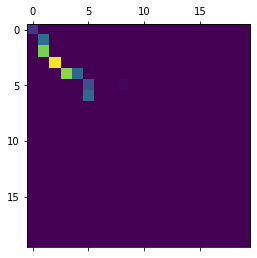

In [53]:
plt.matshow(c)